# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# **Importing dataset**

In [2]:
dataset = pd.read_csv('train.csv')
X = dataset.drop(['SalePrice', 'Id'], axis=1)
y = dataset['SalePrice']
y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


# **Feature Engineering**

In [3]:
# 1. Total Bathrooms
# We create a single feature for bathrooms, with half-baths weighted as 0.5..
X['TotalBath'] = X['FullBath'] + (0.5 * X['HalfBath']) + X['BsmtFullBath'] + (0.5 * X['BsmtHalfBath'])

# 2. Total Square Footage
# This combines all above-ground and basement areas into one single, powerful feature.
X['TotalSF'] = X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF']

# 3. House Age and Remodel Status
# The age of a house and whether it has been remodeled are key factors in its value.
X['HouseAge'] = X['YrSold'] - X['YearBuilt']
X['IsRemodeled'] = (X['YearRemodAdd'] != X['YearBuilt']).astype(int)
X = X.drop(['YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'], axis=1)

# **Handling the Missing data**

In [4]:
# The imputation is now handled after one-hot encoding in cell iyQrz7fNpzAI
from sklearn.impute import SimpleImputer

missing=X.columns[X.isnull().any()].tolist()
print(missing)
numerical_cols = X[missing].select_dtypes(include=np.number).columns.tolist()
categorical_cols = X[missing].select_dtypes(exclude=np.number).columns.tolist()

imputer_mean = SimpleImputer(missing_values=np.nan,strategy='median')
X[numerical_cols] = imputer_mean.fit_transform(X[numerical_cols])

imputer_mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X[categorical_cols] = imputer_mode.fit_transform(X[categorical_cols])

print(X.isnull().sum())

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
SaleCondition    0
TotalBath        0
TotalSF          0
HouseAge         0
IsRemodeled      0
Length: 74, dtype: int64


# **Encoding Categorial data**

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# Get categorical column names as a list
categorical_cols_list = X.select_dtypes(include=['object']).columns.tolist()
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_cols_list)], remainder='passthrough')
# Convert sparse matrix to dense array
X = ct.fit_transform(X).toarray()

# **Split the dataset**

In [6]:
from sklearn.model_selection import train_test_split

#split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


# **Train Decision Tree Regression Model on training set**

In [16]:
from sklearn.tree import DecisionTreeRegressor


# Create a Linear Regression model instance
regressor = DecisionTreeRegressor(random_state=1)

# Train the model on your scaled training data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

# **Predicting test set results**

In [17]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[175500. 231500.]
 [178000. 179500.]
 [141000. 122000.]
 [ 75500.  84500.]
 [166000. 142000.]
 [377500. 325624.]
 [251000. 285000.]
 [147400. 151000.]
 [215000. 195000.]
 [289000. 275000.]
 [171000. 175000.]
 [101000.  61000.]
 [175500. 174000.]
 [312500. 385000.]
 [235000. 230000.]
 [119500.  87000.]
 [135750. 125000.]
 [150000.  98600.]
 [223500. 260000.]
 [120000. 143000.]
 [123600. 124000.]
 [135000. 122500.]
 [293077. 236500.]
 [283463. 337500.]
 [ 96500.  76000.]
 [176000. 187000.]
 [130000. 128000.]
 [223500. 179000.]
 [385000. 485000.]
 [141000. 122500.]
 [124000. 106000.]
 [113000. 118000.]
 [100000. 127000.]
 [106250.  80000.]
 [129000. 153000.]
 [326000. 360000.]
 [133000. 132000.]
 [100000.  85500.]
 [320000. 262280.]
 [140000. 112000.]
 [152000. 131000.]
 [157000. 139000.]
 [ 52500.  87000.]
 [100000. 135000.]
 [175000. 181000.]
 [239000. 163500.]
 [118500. 116900.]
 [176000. 159895.]
 [222000. 244600.]
 [301000. 294000.]
 [ 90000.  97000.]
 [279500. 295000.]
 [129900. 12

# **Visualising predicted and test set results**

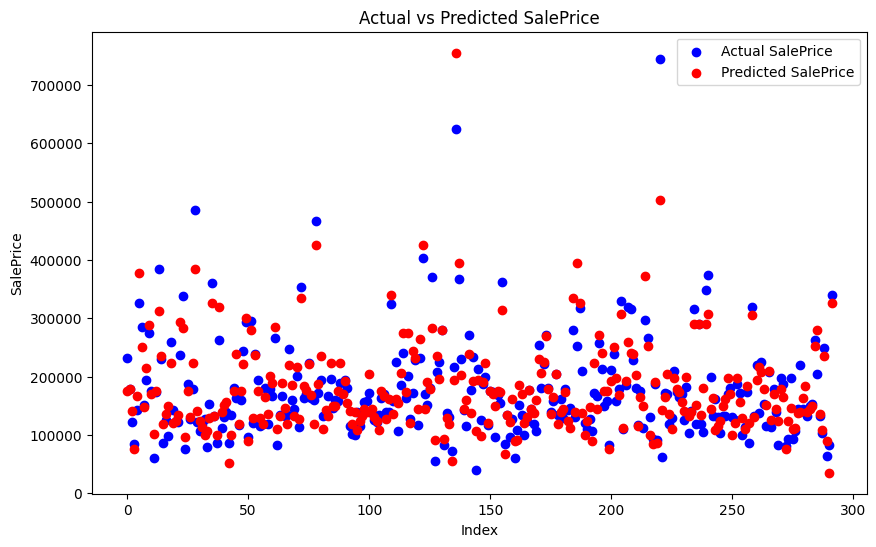

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual SalePrice')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.xlabel('Index')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

# **Evaluation of model**

In [19]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8294804363932781

# **Predicting Results for test.csv**

In [20]:
test_df = pd.read_csv('test.csv')
test_df = test_df.drop(['Id'], axis=1)
test_df['TotalSF'] = test_df['TotalBsmtSF'] + test_df['1stFlrSF'] + test_df['2ndFlrSF']
test_df['TotalBath'] = test_df['FullBath'] + (0.5 * test_df['HalfBath']) + test_df['BsmtFullBath'] + (0.5 * test_df['BsmtHalfBath'])
test_df['Age'] = test_df['YrSold'] - test_df['YearBuilt']
test_df['YearsSinceRemodel'] = test_df['YrSold'] - test_df['YearRemodAdd']
test_df = test_df.drop(['YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'], axis=1)
X_train_original = dataset.drop(['SalePrice', 'Id'], axis=1).copy()
X_train_original['TotalSF'] = X_train_original['TotalBsmtSF'] + X_train_original['1stFlrSF'] + X_train_original['2ndFlrSF']
X_train_original['TotalBath'] = X_train_original['FullBath'] + (0.5 * X_train_original['HalfBath']) + X_train_original['BsmtFullBath'] + (0.5 * X_train_original['BsmtHalfBath'])
X_train_original['Age'] = X_train_original['YrSold'] - X_train_original['YearBuilt']
X_train_original['YearsSinceRemodel'] = X_train_original['YrSold'] - X_train_original['YearRemodAdd']
X_train_original = X_train_original.drop(['YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath'], axis=1)
train_cols_before_encoding = X_train_original.columns.tolist()
test_cols = test_df.columns.tolist()
missing_in_test = list(set(train_cols_before_encoding) - set(test_cols))
for col in missing_in_test:
    test_df[col] = np.nan
extra_in_test = list(set(test_cols) - set(train_cols_before_encoding))
test_df = test_df.drop(columns=extra_in_test)
test_df = test_df[train_cols_before_encoding]
numerical_cols_train_original = X_train_original.select_dtypes(include=np.number).columns.tolist()
categorical_cols_train_original = X_train_original.select_dtypes(include='object').columns.tolist()
imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imputer_mean.fit(X_train_original[numerical_cols_train_original])
imputer_mode.fit(X_train_original[categorical_cols_train_original])
test_df[numerical_cols_train_original] = imputer_mean.transform(test_df[numerical_cols_train_original])
test_df[categorical_cols_train_original] = imputer_mode.transform(test_df[categorical_cols_train_original])
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(handle_unknown='ignore'), categorical_cols_train_original)], remainder='passthrough')
X_train_imputed = X_train_original.copy()
X_train_imputed[numerical_cols_train_original] = imputer_mean.transform(X_train_imputed[numerical_cols_train_original])
X_train_imputed[categorical_cols_train_original] = imputer_mode.transform(X_train_imputed[categorical_cols_train_original])
ct.fit(X_train_imputed)
X_test_processed = ct.transform(test_df)
test_predictions = regressor.predict(X_test_processed)
print("Predictions for the new data:")
print(test_predictions)
submission_df = pd.DataFrame({ 'SalePrice': test_predictions})
submission_df.to_csv('submission.csv', index=False)



Predictions for the new data:
[ 90000.  90000. 165600. ...  84900. 187500. 165600.]
